In [3]:
import  pickle
import pandas as pd
import numpy as np
from collections import Counter
from scipy import stats
from datetime import datetime
from scipy.stats import pearsonr
import matplotlib, matplotlib.pyplot as plt

In [4]:
df = pickle.load(open( "BasicFrameFullGraph.pickle", "rb" ))

In [5]:
df['VAL']=1
df[0:3]

,SRC,TGT,VOT,RES,TXT,DAT,YEA,SRC_ID,TGT_ID,SRC_IN_DEGREE,SRC_OUT_DEGREE,TGT_IN_DEGREE,TGT_OUT_DEGREE,NUM_WORDS,CLUSTERING,VAL
0,Steel1943,BDD,1,1,'''Support''' as co-nom.,"23:13, 19 April 2013",2013,7461,9542,0,4,137,5,3,,1
1,Cuchullain,BDD,1,1,'''Support''' as nominator.--,"01:04, 20 April 2013",2013,3992,9542,62,2,137,5,3,,1
2,INeverCry,BDD,1,1,'''Support''' per noms.,"23:43, 19 April 2013",2013,2134,9542,110,23,137,5,3,,1


Cleanup Empty Dates

In [6]:
df['DAT'].replace(' ', np.nan, inplace=True)
df.dropna(subset=['DAT'], inplace=True)
df['date']=pd.to_datetime(df['DAT'], format='%H:%M, %d %B %Y')
df.set_index('date',inplace=True)
df[0:3]

,SRC,TGT,VOT,RES,TXT,DAT,YEA,SRC_ID,TGT_ID,SRC_IN_DEGREE,SRC_OUT_DEGREE,TGT_IN_DEGREE,TGT_OUT_DEGREE,NUM_WORDS,CLUSTERING,VAL
date,,,,,,,,,,,,,,,,
2013-04-19 23:13:00,Steel1943,BDD,1,1,'''Support''' as co-nom.,"23:13, 19 April 2013",2013,7461,9542,0,4,137,5,3,,1
2013-04-20 01:04:00,Cuchullain,BDD,1,1,'''Support''' as nominator.--,"01:04, 20 April 2013",2013,3992,9542,62,2,137,5,3,,1
2013-04-19 23:43:00,INeverCry,BDD,1,1,'''Support''' per noms.,"23:43, 19 April 2013",2013,2134,9542,110,23,137,5,3,,1


In [7]:
def myDegRatio(vn, vs):
    return vn/vs

In [69]:
def getUserDetails2(table, user):
    user=table.loc[table['SRC'] == user]
    user.reset_index(inplace=True)
    resam1=user.drop_duplicates(subset=['date'], keep='last')
    resam1.set_index('date',inplace=True)
    resam1.sort_index(inplace=True, ascending=True)
    resam1['SUM']=resam1.VAL.cumsum()
    resam1['lentxt']=resam1['TXT'].apply(len)
    #tbl=resam1['SUM']
    tbl=resam1.loc[:,'SUM':'lentxt']
    tbl2=tbl.resample('M', convention='end').mean()
    tbl2.fillna(method='ffill', inplace=True)
    #tbl2=tbl2.to_frame()
    tbl2['shift']=tbl2.SUM.shift()
    tbl2['ratio']=myDegRatio(tbl2['SUM'],tbl2['shift'])
    x=np.arange(len(tbl2))
    y=tbl2['SUM'].tolist()
    pcoef=pearsonr(x,y)
    print("RATIO =",tbl2['ratio'].describe())
    #print("SUM = ",tbl2['SUM'].describe())
    print("Pearson coef. = ", pcoef[0])
    print("P value = ", pcoef[1])
    print(tbl2.corr())
    plt.subplot(3,1,1)
    
    plt.plot(tbl2['SUM'],'r-*')
    plt.xticks(rotation='vertical')
    plt.subplot(3,1,2)
    plt.plot(tbl2['ratio'])
    plt.xticks(rotation='vertical')
    plt.subplot(3,1,3)
    plt.plot(tbl2['lentxt'])
    plt.xticks(rotation='vertical')
    plt.savefig('gt.png')
    plt.show()
    return tbl2

D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


RATIO = count    43.000000
mean      1.241038
std       1.138651
min       1.000000
25%       1.000000
50%       1.013216
75%       1.026251
max       8.333333
Name: ratio, dtype: float64
Pearson coef. =  0.8612574084845876
P value =  6.332346885832341e-14
             SUM    lentxt     shift     ratio
SUM     1.000000 -0.104380  0.994384 -0.582437
lentxt -0.104380  1.000000  0.000124 -0.024979
shift   0.994384  0.000124  1.000000 -0.590303
ratio  -0.582437 -0.024979 -0.590303  1.000000


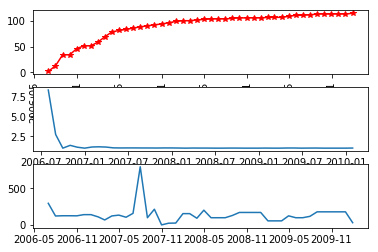

In [37]:
a=getUserDetails2(df, 'Viridae')

In [38]:
cnt=counts.most_common()
cnt[360]

NameError: name 'counts' is not defined

In [47]:
user=df.loc[df['SRC'] == 'Naconkantari']

D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


RATIO = count    51.000000
mean      1.279753
std       1.389834
min       1.000000
25%       1.000000
50%       1.018152
75%       1.068022
max      10.857143
Name: ratio, dtype: float64
Pearson coef. =  0.9325476457620164
P value =  9.068853239746908e-24
             SUM    lentxt     shift     ratio
SUM     1.000000 -0.617980  0.998970 -0.417053
lentxt -0.617980  1.000000 -0.659611  0.062428
shift   0.998970 -0.659611  1.000000 -0.408366
ratio  -0.417053  0.062428 -0.408366  1.000000


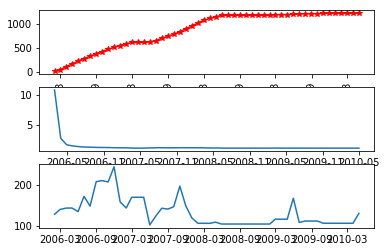

In [48]:
a=getUserDetails2(df, 'Siva1979')

D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


RATIO = count    178.000000
mean       1.035796
std        0.196225
min        1.000000
25%        1.000000
50%        1.000000
75%        1.012907
max        3.400000
Name: ratio, dtype: float64
Pearson coef. =  0.7224684737967374
P value =  3.5387961143212435e-30
             SUM    lentxt     shift     ratio
SUM     1.000000  0.271083  0.999796 -0.503401
lentxt  0.271083  1.000000  0.300051 -0.013444
shift   0.999796  0.300051  1.000000 -0.500714
ratio  -0.503401 -0.013444 -0.500714  1.000000


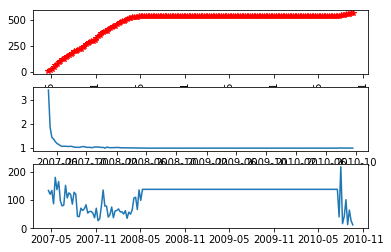

In [61]:
a=getUserDetails2(df, 'Jmlk17')

RATIO = count    69.000000
mean      1.068686
std       0.279813
min       1.000000
25%       1.002237
50%       1.009091
75%       1.040146
max       3.241379
Name: ratio, dtype: float64
Pearson coef. =  0.9233003734250204
P value =  5.731273736919034e-30
             SUM    lentxt     shift     ratio
SUM     1.000000  0.104541  0.999093 -0.504042
lentxt  0.104541  1.000000  0.075671 -0.095509
shift   0.999093  0.075671  1.000000 -0.520247
ratio  -0.504042 -0.095509 -0.520247  1.000000


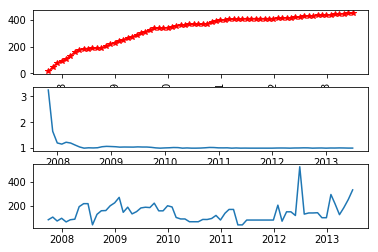

In [50]:
a=getUserDetails2(df, 'Pharaoh of the Wizards')

D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


RATIO = count    10.000000
mean      1.513602
std       0.853735
min       1.044295
25%       1.094090
50%       1.160952
75%       1.409855
max       3.806452
Name: ratio, dtype: float64
Pearson coef. =  0.9885536623036546
P value =  1.0575016457096048e-08
             SUM    lentxt     shift     ratio
SUM     1.000000  0.882135  0.998614 -0.805524
lentxt  0.882135  1.000000  0.918331 -0.501467
shift   0.998614  0.918331  1.000000 -0.778148
ratio  -0.805524 -0.501467 -0.778148  1.000000


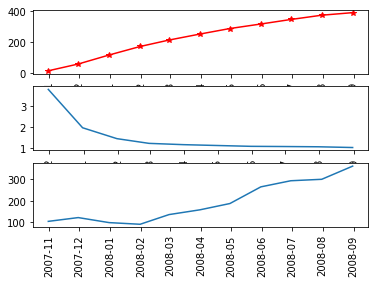

In [70]:
a=getUserDetails2(df, "Rudget")

D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


RATIO = count    55.000000
mean      1.083348
std       0.326717
min       1.000000
25%       1.000000
50%       1.000000
75%       1.036007
max       3.285714
Name: ratio, dtype: float64
Pearson coef. =  0.8125504778772407
P value =  2.895249007098946e-14
             SUM    lentxt     shift     ratio
SUM     1.000000  0.589864  0.995646 -0.528272
lentxt  0.589864  1.000000  0.609700 -0.161904
shift   0.995646  0.609700  1.000000 -0.559459
ratio  -0.528272 -0.161904 -0.559459  1.000000


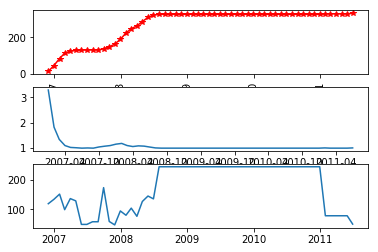

In [52]:
a=getUserDetails2(df, 'Sharkface217')

D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


RATIO = count    81.000000
mean      1.102022
std       0.341792
min       1.000000
25%       1.000000
50%       1.004983
75%       1.031891
max       3.000000
Name: ratio, dtype: float64
Pearson coef. =  0.8491506684606631
P value =  6.896914195483806e-24
             SUM    lentxt     shift     ratio
SUM     1.000000 -0.178935  0.999411 -0.643766
lentxt -0.178935  1.000000 -0.191527  0.055192
shift   0.999411 -0.191527  1.000000 -0.632805
ratio  -0.643766  0.055192 -0.632805  1.000000


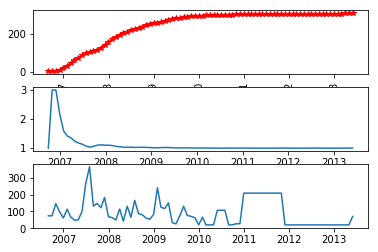

In [53]:
a=getUserDetails2(df, 'Bibliomaniac15')

RATIO = count    12.000000
mean      1.899022
std       2.208244
min       1.051625
25%       1.088000
50%       1.180959
75%       1.347872
max       8.833333
Name: ratio, dtype: float64
Pearson coef. =  0.9951908871477655
P value =  1.8811747136246914e-12
             SUM    lentxt     shift     ratio
SUM     1.000000  0.742541  0.995846 -0.606709
lentxt  0.742541  1.000000  0.838470 -0.291219
shift   0.995846  0.838470  1.000000 -0.592011
ratio  -0.606709 -0.291219 -0.592011  1.000000


D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


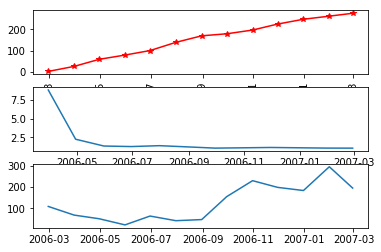

In [54]:
a=getUserDetails2(df, 'Sarah Ewart')

RATIO = count    14.000000
mean      1.404483
std       0.368505
min       1.045161
25%       1.222492
50%       1.278660
75%       1.557143
max       2.500000
Name: ratio, dtype: float64
Pearson coef. =  0.9779550673490417
P value =  3.1762021087019875e-10
             SUM    lentxt     shift     ratio
SUM     1.000000  0.339959  0.995618 -0.740640
lentxt  0.339959  1.000000  0.532309 -0.225245
shift   0.995618  0.532309  1.000000 -0.720838
ratio  -0.740640 -0.225245 -0.720838  1.000000


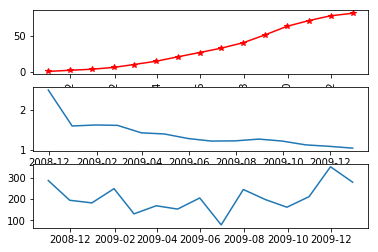

In [55]:
a=getUserDetails2(df, 'Backslash Forwardslash')

D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
D:\sw\anaconda\envs\fastai\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


RATIO = count    11.000000
mean      1.689941
std       1.241472
min       1.000000
25%       1.020833
50%       1.114943
75%       1.434477
max       4.333333
Name: ratio, dtype: float64
Pearson coef. =  0.9659317508455837
P value =  3.413335565671304e-07
             SUM    lentxt     shift     ratio
SUM     1.000000 -0.311305  0.973888 -0.285593
lentxt -0.311305  1.000000 -0.260326 -0.187309
shift   0.973888 -0.260326  1.000000 -0.425762
ratio  -0.285593 -0.187309 -0.425762  1.000000


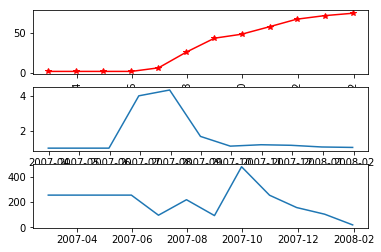

In [56]:
a=getUserDetails2(df, 'Wikidudeman')

RATIO = count    69.000000
mean      1.045950
std       0.135545
min       1.000000
25%       1.000000
50%       1.000000
75%       1.041667
max       2.000000
Name: ratio, dtype: float64
Pearson coef. =  0.9872364134813345
P value =  5.4083333777468475e-56
             SUM    lentxt     shift     ratio
SUM     1.000000  0.114619  0.996726 -0.235269
lentxt  0.114619  1.000000  0.109753 -0.050244
shift   0.996726  0.109753  1.000000 -0.287035
ratio  -0.235269 -0.050244 -0.287035  1.000000


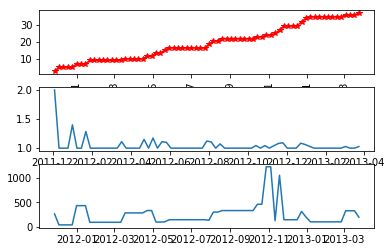

In [63]:
a=a=getUserDetails2(df, 'Slon02')

In [58]:
a.corr()

,SUM,lentxt,shift,ratio
SUM,1.000000,0.163289,0.988492,-0.406614
lentxt,0.163289,1.000000,0.103029,0.170452
shift,0.988492,0.103029,1.000000,-0.490233
ratio,-0.406614,0.170452,-0.490233,1.000000


In [46]:
def myDegRatio(vn, vs):
    return vn/vs
    

In [75]:
#frameNY.corr()
#result = stats.pearsonr(cl_sorted, vol_sorted)